In [57]:
%load_ext autoreload
%autoreload 2
from pathlib import Path

import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader

from nerf2d import NeRF2D_LightningModule
from nerf2d_dataset import read_image_folder, NeRFDataset2D

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
ckpt_path = '../checkpoints/last-v1.ckpt'
nerf = NeRF2D_LightningModule.load_from_checkpoint(ckpt_path).to('cpu')

In [3]:
# read test set
dataset_folder = Path('../data/cube')
ims, poses, focal, depths = read_image_folder(dataset_folder / 'test')
dataset = NeRFDataset2D(ims, poses, focal, depths)
dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

In [4]:
def show_colors(colors, names=None):
    if names is None:
        names = [''] * len(colors)

    fig, ax = plt.subplots(1, len(colors), figsize=(len(colors), 1))
    for i, color in enumerate(colors):
        ax[i].imshow(color.expand(1, 1, 3).detach().numpy())
        ax[i].set_axis_off()
        ax[i].set_title(names[i])

    plt.show()

def get_nth_batch(n, loader):
    for i, batch in enumerate(loader):
        if i == n:
            return batch

In [9]:

ray_idx = 20

# get dataset entry
o, d, color_gt, depth_gt = get_nth_batch(ray_idx, dataloader)

# nerf forward pass
with torch.no_grad():
    outs = nerf(o, d)


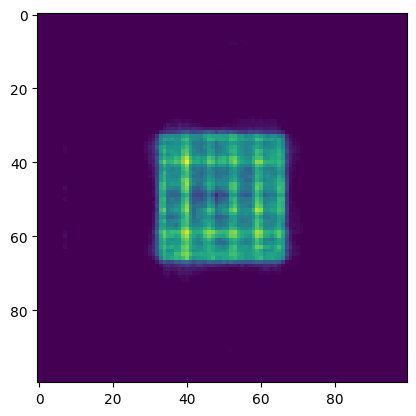

In [72]:
from einops import rearrange

densities = nerf.render_density_field()



plt.imshow(densities)
